**Información de fútbol**


https://datahub.io/sports-data/english-premier-league#resource-season-1819 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import seaborn as sns
import datetime
from sklearn.tree import DecisionTreeClassifier
set_config(display='diagram')

df = pd.read_csv('/content/Match_team_statistics.csv')
df.head()

,MatchID,HomeTeamName,AwayTeamName,TeamID,TeamName,IsHomeTeam,IsAwayTeam,StatsID,StatsName,Value,Rank
0,2024442,Austria,North Macedonia,8,Austria,True,False,1,Goals,3,1
1,2024442,Austria,North Macedonia,8,Austria,True,False,2,Ball Possession,60,1
2,2024442,Austria,North Macedonia,8,Austria,True,False,3,Total Attempts,11,1
3,2024442,Austria,North Macedonia,8,Austria,True,False,4,Attempts on target,7,1
4,2024442,Austria,North Macedonia,8,Austria,True,False,5,Attempts off target,2,2


In [4]:
#Revisamos la información de nuestra base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19194 entries, 0 to 19193
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MatchID       19194 non-null  int64 
 1   HomeTeamName  19194 non-null  object
 2   AwayTeamName  19194 non-null  object
 3   TeamID        19194 non-null  int64 
 4   TeamName      19194 non-null  object
 5   IsHomeTeam    19194 non-null  bool  
 6   IsAwayTeam    19194 non-null  bool  
 7   StatsID       19194 non-null  int64 
 8   StatsName     19194 non-null  object
 9   Value         19194 non-null  object
 10  Rank          19194 non-null  int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 1.4+ MB


In [5]:
#revisamos cantidad de columnas y filas
df.shape

(19194, 11)

In [6]:
#Revisamos los faltantes
df.isna().sum()

MatchID         0
HomeTeamName    0
AwayTeamName    0
TeamID          0
TeamName        0
IsHomeTeam      0
IsAwayTeam      0
StatsID         0
StatsName       0
Value           0
Rank            0
dtype: int64

In [7]:
#Revisamos los faltantes
df.isna().sum()

MatchID         0
HomeTeamName    0
AwayTeamName    0
TeamID          0
TeamName        0
IsHomeTeam      0
IsAwayTeam      0
StatsID         0
StatsName       0
Value           0
Rank            0
dtype: int64

In [8]:
df.value_counts()

MatchID  HomeTeamName  AwayTeamName  TeamID  TeamName     IsHomeTeam  IsAwayTeam  StatsID  StatsName                                     Value  Rank
2024441  Netherlands   Ukraine       95      Netherlands  True        False       1        Goals                                         3      1       1
2024475  Germany       Hungary       47      Germany      True        False       195      Time spent in low activity (%)                83     1       1
                                                                                  193      Average distance covered in high activity     1915   2       1
                                                                                  192      Average distance covered in medium activity   1762   2       1
                                                                                  191      Average distance covered in low activity      5850   2       1
                                                                                 

In [9]:
df.describe().round()

,MatchID,TeamID,StatsID,Rank
count,19194.0,19194.0,19194.0,19194.0
mean,2024466.0,12717.0,140.0,1.0
std,15.0,23914.0,143.0,0.0
min,2024441.0,8.0,1.0,1.0
25%,2024453.0,43.0,59.0,1.0
50%,2024466.0,110.0,110.0,1.0
75%,2024479.0,144.0,165.0,2.0
max,2024491.0,59205.0,683.0,2.0


# **Explorar los datos (visualizaciones)**

<ipython-input-34-252516901c8e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-34-252516901c8e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = "Set2", annot = True)


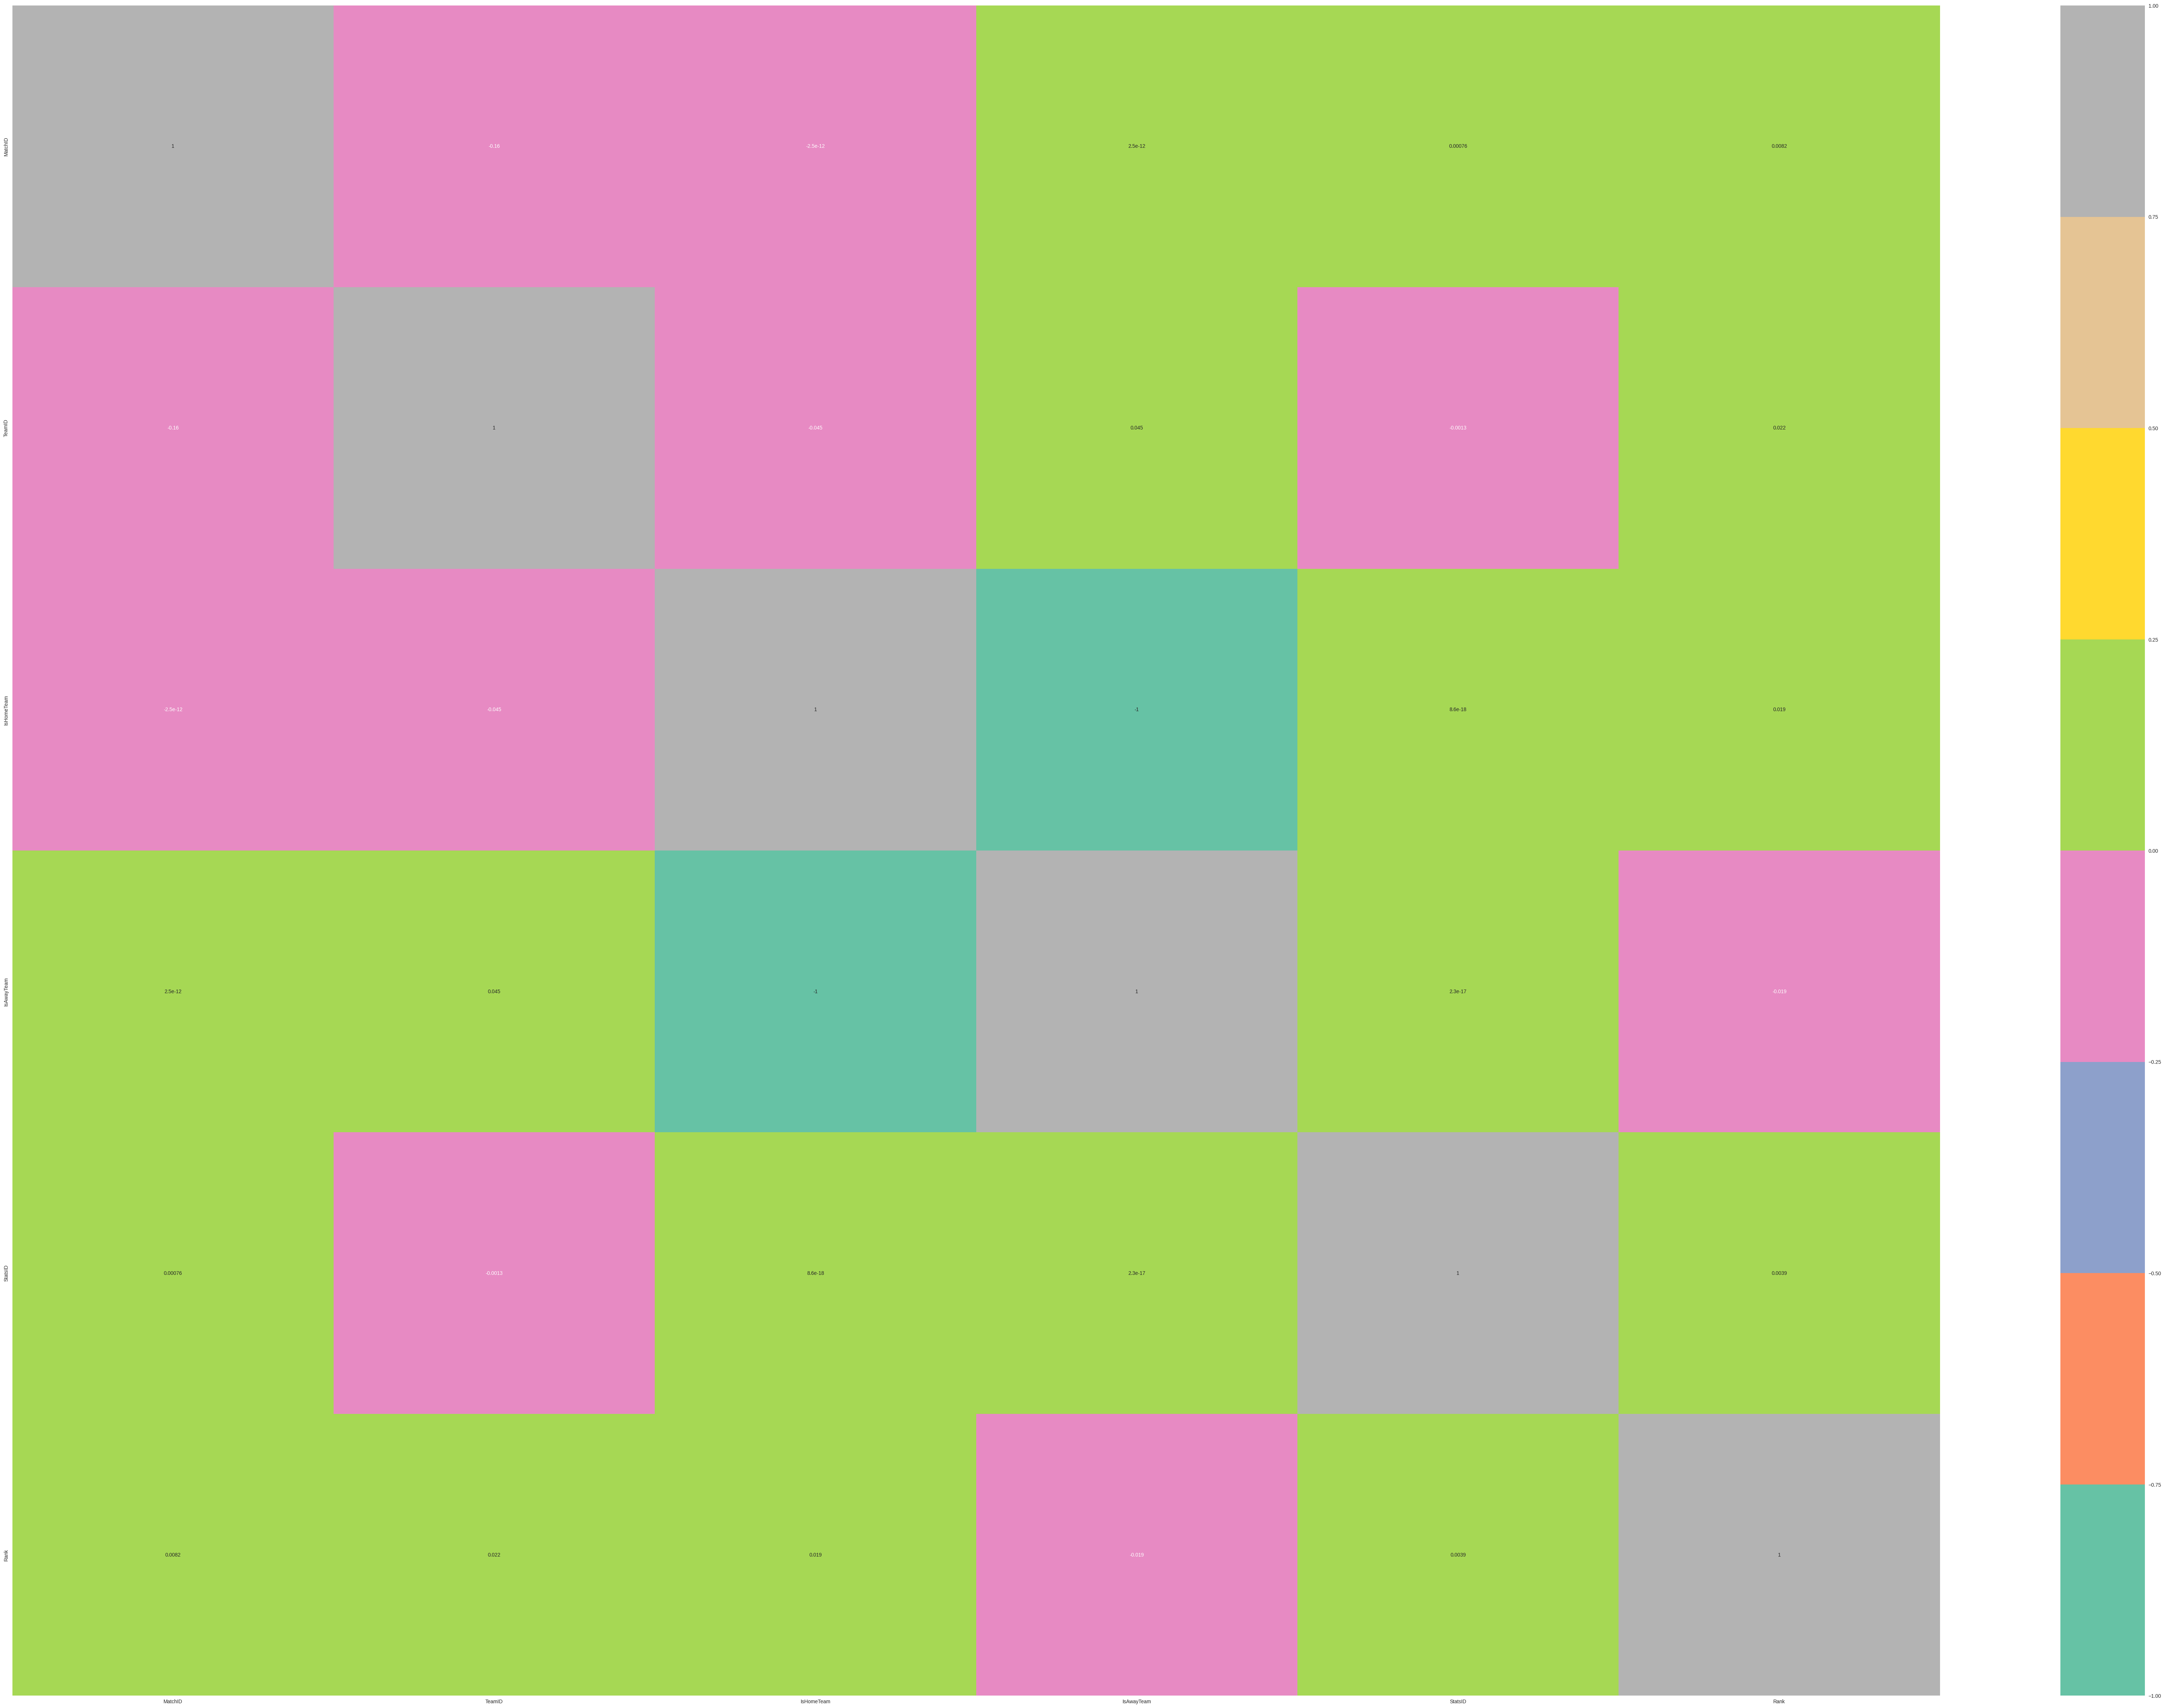

In [34]:
#Mapa de calor para entender las variables 
plt.style.use('seaborn')
plt.figure(figsize=(85, 60))

sns.heatmap(df.corr(),cmap = "Set2", annot = True)

plt.show()

<ipython-input-22-521d09dad0da>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


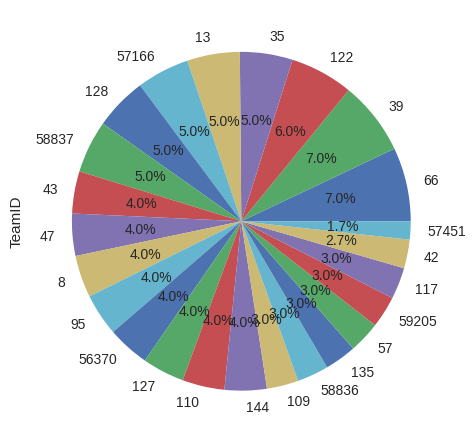

In [22]:
plt.figure(dpi=100)
plt.style.use('seaborn')
df["TeamID"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# **Creamos un modelo de predicción.**

In [23]:
# Paso 1: aplicaremos TrainTestSplit. y realizaremos impresiones para revisar los datos

y = df['TeamID']
X = df.drop(columns = 'TeamID')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
print(len(X_train))
print(len(X_test))

14395
4799


# **Árboles de clasificación**

In [25]:
scaler = StandardScaler()

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)

In [27]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [29]:
logreg = LogisticRegression()

In [30]:
logreg_pipe = make_pipeline(scaler, logreg)